In [223]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

In [224]:
import warnings
warnings.filterwarnings('ignore')

### Step 1. Load our data

In [225]:
train = np.loadtxt('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Python/Python_repository/Computer Vision/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Python/Python_repository/Computer Vision/test.csv', delimiter=',', skiprows=1)

In [226]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [227]:
print(train_img.shape)
print(test_img.shape)

(42000, 28, 28)
(28000, 28, 28)


### Визуализируем исходные данные

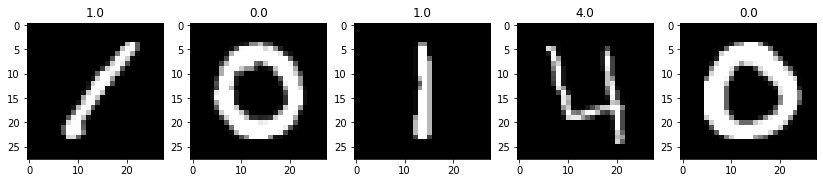

In [228]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

### Стандартизуем данные с помощью StandardScaler

In [229]:
y_train = train_label
X_train = train_img.reshape(-1, 28 * 28).astype(np.float32)

In [230]:
X_test = test_img.reshape(-1, 28 * 28).astype(np.float32)

### Извлекаем признаки с помощью PCA и с помощью LogisticRegression класифицируем наши данные

In [231]:
X_train_scaler = StandardScaler().fit_transform(X_train)

In [232]:
# Делим тестовую выборку на test и validation
X_train_img, X_val_img, y_train_lbl, y_val_lbl = train_test_split(X_train_scaler, y_train, test_size=0.2, random_state=42)

In [233]:
# Извлекаем признаки с помощью PCA и обучаем на train
pca = PCA(0.95)
pca.fit(X_train_img)

PCA(n_components=0.95)

In [234]:
X_train_PCA = pca.transform(X_train_img)
X_val_PCA = pca.transform(X_val_img)

In [235]:
clf = RandomForestClassifier()

In [236]:
# Обучаем модель
clf.fit(X_train_PCA, y_train_lbl)

RandomForestClassifier()

In [237]:
# Оцениваем скор на тесте и валидационной выборке
accuracy_train = clf.score(X_train_PCA, y_train_lbl)
accuracy_val = clf.score(X_val_PCA, y_val_lbl)

In [238]:
print(accuracy_train)
print(accuracy_val)

1.0
0.9328571428571428


In [239]:
y_preds_val = clf.predict(X_val_PCA)

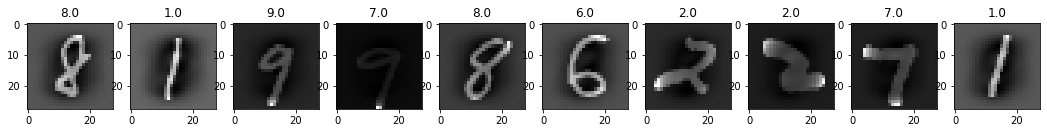

In [240]:
# Визуализируем предсказания на валидационной выборки
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X_val_img[0:10], 1):
    subplot = fig.add_subplot(1, 11, i)
    subplot.set_title('%s' % y_preds_val[i - 1])
    plt.imshow(img.reshape((28,28)), cmap='gray')

### Визуализируем предсказания на тестовых данных

In [241]:
X_test_scaler = StandardScaler().fit_transform(X_test)

In [242]:
X_test_PCA = pca.transform(X_test_scaler)

In [243]:
y_preds = clf.predict(X_test_PCA)

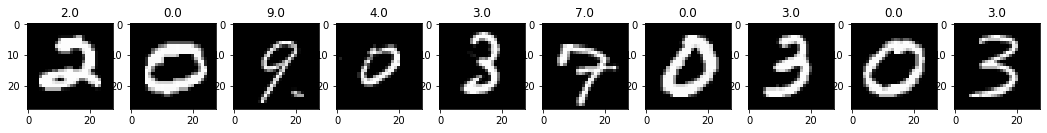

In [244]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(1, 11, i)
    subplot.set_title('%s' % y_preds[i - 1])
    plt.imshow(img.reshape((28,28)), cmap='gray')

### Готовим файл для отправки

In [245]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_preds, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [246]:
!head submit.csv

ImageId,Label
1,2
2,0
3,9
4,4
5,3
6,7
7,0
8,3
9,0
